# 投资组合理论和计算

+ 市场中常常有非常多的资产可供选择，如何进行资产选择和配置，是投资的首要问题。
+ 投资组合理论关注这类问题
+ 投资组合理论考虑收益和风险两个因素和基于两个原则。
   - 收益尽可能高
   - 风险尽可能小


##  期望收益和风险的平衡

进行投资，或者选择投资组合，需要考虑的那些因素呢？
1.  收益尽可能高，
   - 预期收益率，尽可能地获得高的收益率；预期收益率越高，投资或投资组合就越好   
   - 对于风险资产，预期收益率只是一个期望的概念，在一次投资中究竟得到多少收益率具有不确定性。
   - 这种不确定性就是风险
   

**风险的概念** 

+ 比如 我们投资某项资产可能有两种情况，一种情况是收益10%和亏损10%的概率都是50%。投资这种资产的预期收益率就是0。
+ 若投资第二种资产可能有两种结果，一是收益20%的概率为50%，二十亏损20%的概率为50%。投资这种资产的预期收益率仍然是0。
+ 虽然两种资产的预期收益率是一样的，但显然其风险是不同的。直观上，第二种的风险更高。

   2 . 风险，尽可能小
 
   - 这里涉及如何定义风险的问题，
   - 上面的例子中第二种资产的风险更高， 我们看出是因为不确定性更大，通常用方差或标准差定义
   

   + 第一种资产和第二种资产的标准差：   

In [1]:
print((0.5*(0.1-0)**2+0.5*(-0.1-0)**2)**(0.5),",", (0.5*(0.2-0)**2+0.5*(-0.2-0)**2)**(0.5))

0.1 , 0.2


+ 通常情形下，预期收益率高的产品一般风险也会较高，这种较高的收益率是一种风险溢价
    - 比如固定收益产品，银行存款或者国家债券，其收益率较低，但不确定性，即风险非常低。
    - 我们将那些没有风险的资产的收益率叫做无风险收益
    - 通常的证券市场，特别是股票产品的风险都比无风险资产（比如国债）高很多，其收益有更大的不确定性。
    - 风险资产的收益高于无风险资产的部分原因正是因为风险，这部分收益也被称为风险溢价，是对承担风险的补偿。如果风险没有溢价，理论上是没有人愿意承担风险的。

+ 因此，对不同的资产，我们就需要对其预期收益率和风险水平进行比较，选择在某种设定下最优的资产或组合
   - 给定风险的条件下，最大化预期收益率
   - 给定预期收益率的条件下，极小化风险 
   
+ 下面代码给出了一个资产的收益率的常用统计量，其中在基本的投资组合理论中，我们主要关心 均值和标准差

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline


In [3]:

#%run getsinadata.py
#id="000001"
#id="601899"
#start="1990-12-1";end="2015-1-1"
#data=get_sina_stock(id,start,end,isstock=False)
data=pd.read_csv("data/000001.csv",index_col=0,parse_dates=True)
close=data.ix["1990":"2014"]["close"]
closeyear=close.resample("A-DEC").last()
ret=closeyear.pct_change()  
print(ret)

date
1991-12-31         NaN
1992-12-31    1.288096
1993-12-31   -0.043177
1994-12-31   -0.249535
1995-12-31   -0.240566
1996-12-31    4.144641
1997-12-31    1.070783
1998-12-31   -0.345818
1999-12-31    0.207648
2000-12-31   -0.047447
2001-12-31   -0.156334
2002-12-31   -0.135141
2003-12-31   -0.175335
2004-12-31   -0.225619
2005-12-31   -0.068286
2006-12-31    1.356674
2007-12-31    1.935122
2008-12-31   -0.680419
2009-12-31    1.576095
2010-12-31   -0.352069
2011-12-31   -0.012666
2012-12-31    0.035236
2013-12-31    0.235100
2014-12-31    0.572982
Freq: A-DEC, Name: close, dtype: float64


In [4]:
#np.set_printoptions(precision=2)
ret=ret.dropna()
ret.describe()

count    23.000000
mean      0.421303
std       1.073622
min      -0.680419
25%      -0.200477
50%      -0.043177
75%       0.821882
max       4.144641
Name: close, dtype: float64

+ 在分析投资组合之前，我们需要了解市场上单个资产的收益和风险。考虑月收益率，分析市场预期收益和风险及其变化。详情见分组作业。

## 一个风险资产和一个无风险资产的组合

+ 假设市场中只有无风险资产和一种风险资产，如果分配资金？
+ 设无风险资产的收益率为4%，风险资产为上证指数基金，年收益率的期望为0.2633，标准差为0.5843
+ 我们要根据该信息在无风险资产和指数基金之间分配资金，
   - 设总资产为1，分配到指数基金的资产为$w$，分配到无风险资产上的资金为$1-w$
   - 则组合的预期收益率为：
     $$E(R)=0.2233w$$
   - 标准差为：
   $$\sigma_R^2=0.5843w $$

In [45]:
import sympy as sy
from sympy.interactive import printing
printing.init_printing(use_latex=True)

w=sy.symbols('w',positive = True, real = True)
print(w)
ExpRet=w*0.2633+(1-w)*0.04

StdRet=sy.sqrt(w**2*0.5843**2+(1-w)**2*0)
print(StdRet)
ExpRet,StdRet


w
0.5843*w


+ 显然，给定预期收益率，投资权重就确定了，从而风险也确定了。
+ 同样，给定能承受的风险，投资权重也确定了，从而预期收益率也就确定了。
+ 因此，以权重为参数，$(0.2233⋅w + 0.04, 0.5843⋅w)$给出了投资组合预期收益和风险（标准差）之间的关系

[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1. ]
[ 0.       0.05843  0.11686  0.17529  0.23372  0.29215  0.35058  0.40901
  0.46744  0.52587  0.5843 ]


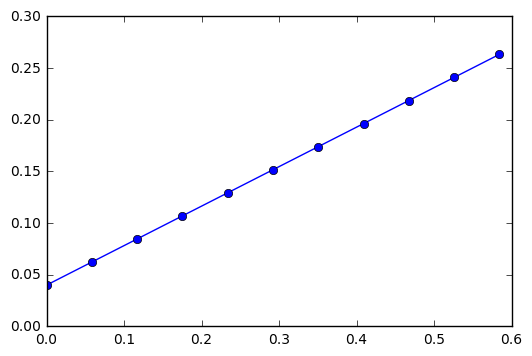

In [46]:
#from sympy.plotting import plot_parametric
import matplotlib.pyplot as plt
%matplotlib inline
#sy.plotting.plot_parametric(StdRet,ExpRet,(w,0,1),xlabel=r"$\sigma_R$",ylabel="mean")
##sy.lambdify??
meanf= sy.lambdify(w, ExpRet, "numpy")
stdf=sy.lambdify(w,StdRet,"numpy")
wv=np.linspace(0,1,11)
print(wv)
stdv=stdf(wv)
meanv=meanf(wv)
print(stdv)
plt.plot(stdv,meanv,"bo-")  


+ 一般地，一个最优投资组合可以通过两个步骤进行：
   1. 寻找最优的风险资产的投资组合，这个组合通常被称为切线组合"tanency protfolio"
   2. 设定切线组合和无风险资产的恰当比例，形成最终的最优投资组合。
+ 第二步就用我们上面介绍的方法确定。
+ 虽然投资组合选择的最终目标是在众多风险资产和无风险资产中选择最优的组合，单很多有关投资组合的概念我们只需要讨论两个风险资产和无风险资产的组合就足够了
+ 下面首先讨论两个风险资产的投资组合，然后再加入无风险资产，讨论三个资产的投资组合

## 两个风险资产

+ 假设两个风险资产的收益率随机变量分别为 $R_1$和$R_2$

+  投资到两个资产的资本权重为$w$和$1-w$。 则投资组合的收益率为：

$$R=wR_1+(1-w)R_2$$

+ 计算上面投资组合的期望和方差，需要各自的期望方差和两个变量的相关系数
$$\mu_1,\mu_2,\sigma_1,\sigma_2,\rho_{12}$$

显然：
 $$E(R)=w\mu_1+(1-w)\mu_2$$
$$\sigma_R^2=w^2\sigma_1^2+(1-w)^2\sigma_2^2+2w(1-w)\rho_{12}\sigma_1\sigma_2$$

+ 首先通过一个虚拟的例子来说明
   
   设 $$\mu_1=0.14,\mu_2=0.08,\sigma_1=0.2,\sigma_2=0.15,\rho_{12}=0$$

0.0625*w**2 - 0.045*w + 0.0225


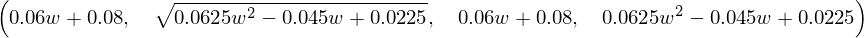

In [60]:
printing.init_printing(use_latex=True)

mu1=0.14;mu2=0.08;sig1=0.2;sig2=0.15;rho12=0

ExpRet=mu2+(mu1-mu2)*w

Varf=sy.simplify(sig1**2*w**2+sig2**2*(1-w)**2+2*w*(1-w)*rho12*sig1*sig2)

print(Varf)
StdRet=sy.sqrt(Varf)
sy.simplify(ExpRet),sy.simplify(StdRet),ExpRet,Varf


In [54]:
meanf= sy.lambdify(w, ExpRet, "numpy")
varf=sy.lambdify(w,Varf,"numpy")
wmin=float(-Varf.coeff(w,1)/(2*Varf.coeff(w,2)))

mx=sy.sqrt(varf(wmin))
my=meanf(wmin)

Figure(576x432)
[ 0.      0.0036  0.0072  0.0108  0.0144  0.018   0.0216  0.0252  0.0288
  0.0324  0.036   0.0396  0.0432  0.0468  0.0504  0.054   0.0576  0.0612
  0.0648  0.0684  0.072   0.0756  0.0792  0.0828  0.0864  0.09    0.0936
  0.0972  0.1008  0.1044  0.108   0.1116  0.1152  0.1188  0.1224  0.126
  0.1296  0.1332  0.1368  0.1404  0.144   0.1476  0.1512  0.1548  0.1584
  0.162   0.1656  0.1692  0.1728  0.1764  0.18    0.1836  0.1872  0.1908
  0.1944  0.198   0.2016  0.2052  0.2088  0.2124  0.216   0.2196  0.2232
  0.2268  0.2304  0.234   0.2376  0.2412  0.2448  0.2484  0.252   0.2556
  0.2592  0.2628  0.2664  0.27    0.2736  0.2772  0.2808  0.2844  0.288
  0.2916  0.2952  0.2988  0.3024  0.306   0.3096  0.3132  0.3168  0.3204
  0.324   0.3276  0.3312  0.3348  0.3384  0.342   0.3456  0.3492  0.3528
  0.3564  0.36  ]


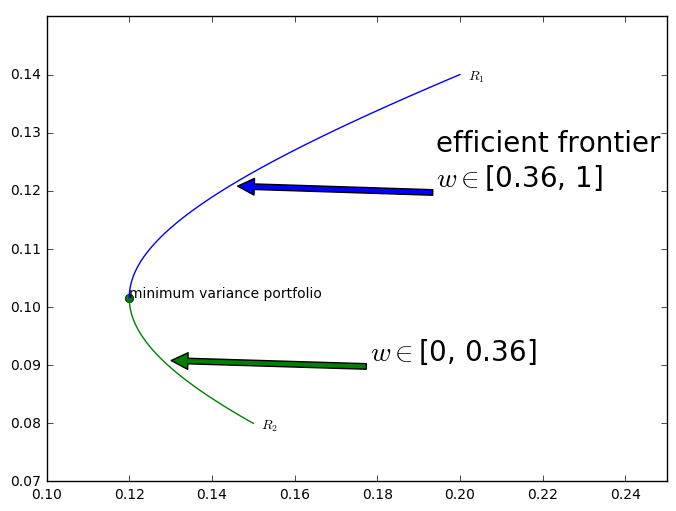

In [70]:
#a=plot_parametric(StdRet,ExpRet,(w,0,1),xlabel=r"$\sigma_R$",ylabel="$E(R)$",axis_center=(0.11,0.11),xlim=[0.11,0.21])
#a.save("aa.jpg")


meanf= sy.lambdify(w, ExpRet, "numpy")##define a function
varf=sy.lambdify(w,Varf,"numpy")

# %matplotlib qt
%matplotlib inline

fig=plt.figure(figsize=(8,6)) 
print(fig)

plt.text(sig1+0.002,mu1-0.001,"$R_1$")
plt.text(sig2+0.002,mu2-0.001,"$R_2$")##draw R1 R2

wmin=float(-Varf.coeff(w,1)/(2*Varf.coeff(w,2)))##-b/2a
mx=sy.sqrt(varf(wmin));my=meanf(wmin)

##plot the picture
plt.plot(mx,my,"go")
plt.text(mx,my,"minimum variance portfolio")


wv=np.linspace(0,wmin,101)
print(wv)

stdv=np.sqrt(varf(wv))
meanv=meanf(wv)
plt.xlim([0.1,0.25])
plt.ylim([0.07,0.15])
plt.plot(stdv,meanv,"g-")  

plt.annotate("$w\in$"+str([0,wmin]), size=20,xy=(stdv[50]+0.002,meanv[50]),
             xytext=(stdv[50]+0.05,meanv[50]),
            arrowprops=dict(facecolor="green"))



wv=np.linspace(wmin,1,101)
stdv=np.sqrt(varf(wv))
meanv=meanf(wv)
plt.plot(stdv,meanv,"b-") 


plt.annotate("efficient frontier\n"+"$w\in$"+str([wmin,1]), size=20,xy=(stdv[50]+0.002,meanv[50]),
             xytext=(stdv[50]+0.05,meanv[50]),
            arrowprops=dict(facecolor="blue"))


观察上述曲线 $(\sigma_r,E(R))$,我们可以得到几点：

+ 收益在0.08到0.14之间，即单个资产的最高收益率和最低收益率之间
+ 风险（用标准差度量）低于单个资产的最低值
+ 存在风险最低的一个组合，其它组合的风险高于该组合
+ 该组合称为**最小方差组合**，该组合并不是所有组合中收益率最小的。那些收益率低于最小方差组合的投资组合显然是不好的!
+ 在上述曲线的上侧(蓝色)，收益率高于最小方差组合的组合构成了投资组合的**有效前沿**，有效前沿上的投资组合称为**有效组合**，或者称为**均值-方差有效组合**


+ 下面通过两只股票，大秦铁路（601006）和中信证券(600030)来说明投资组合计算，我们使用过去三年的周收益率计算，

In [71]:
%run getsinadata.py
id1="600030"
id2="601006"
start="2012-1-1";end="2015-1-1"
data=get_sina_stock(id1,start,end)
close=data["close"]
closew=close.resample("W",how="last")
ret1=closew.pct_change()
data=get_sina_stock(id2,start,end)
close=data["close"]
closew=close.resample("W",how="last")
ret2=closew.pct_change()


/Applications/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:7: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
/Applications/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:11: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()


In [73]:
ret=pd.DataFrame({"600030":ret1,"601006":ret2})
ret=ret.dropna(how="all")
ret.describe()


,600030,601006
count,153.000000,153.000000
mean,0.010666,0.004031
std,0.061197,0.035032
min,-0.115479,-0.077242
25%,-0.025560,-0.015950
50%,0.007063,-0.002518
75%,0.029555,0.016941
max,0.342990,0.138233


+ 可以看出，两种资产差异比较大，大秦收益率和风险都比较低，而中信证券相对收益率和风险都相对高些。


In [74]:

rho=ret["600030"].corr(ret["601006"])
round(rho,9)##四舍五入


In [11]:
des=(ret1.mean(),ret1.std(),ret2.mean(),ret2.std(),ret1.corr(ret2))
mu1,sig1,mu2,sig2,rho12=des
[round(x,5) for  x in des]

[0.01067, 0.0612, 0.00403, 0.03503, 0.4945]

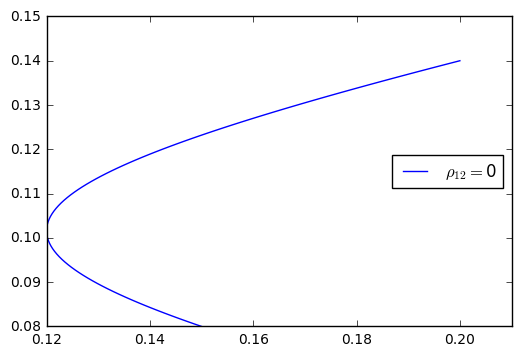

In [75]:
ExpRetreal=mu2+(mu1-mu2)*w
StdRetreal=sy.sqrt(sig1**2*w**2+sig2**2*(1-w)**2+2*w*(1-w)*rho12*sig1*sig2)

meanf= sy.lambdify(w, ExpRetreal, "numpy")
stdf=sy.lambdify(w,StdRetreal,"numpy")
wv=np.linspace(0,1,100)
stdv=stdf(wv)
meanv=meanf(wv)
plt.plot(stdv,meanv,"b-",label=r"$\rho_{12}=$"+str(round(rho12,2)))  
plt.legend(loc="center right")
 
#a=sy.plotting.plot_parametric((StdRetreal,ExpRetreal),(w,0,1),xlabel=r"$\sigma_R$",ylabel="mean",show=False)
#a[0].label=r"$\rho_{12}=$"+str(round(x,2))
#a.legend=True
#a.show()

下面计算最小方差组合，分别给出了权重、期望收益率和最小标准差

In [77]:
varf=sy.simplify(sig1**2*w**2+sig2**2*(1-w)**2+2*w*(1-w)*rho12*sig1*sig2)
wmin=-varf.coeff(w,1)/varf.coeff(w,2)/2
"%.4f %.4f %.4f"%(wmin,  ExpRetreal.subs(w,wmin),   sy.sqrt(varf.subs(w,wmin)))

'0.3600 0.1016 0.1200'

+ 当相关系数不同时，投资组合的有效前沿是不同的，其最小方差组合也是不同的。
+ 相关系数越大最小方差组合的风险越低，这里两个端点就是单个资产的期望和风险

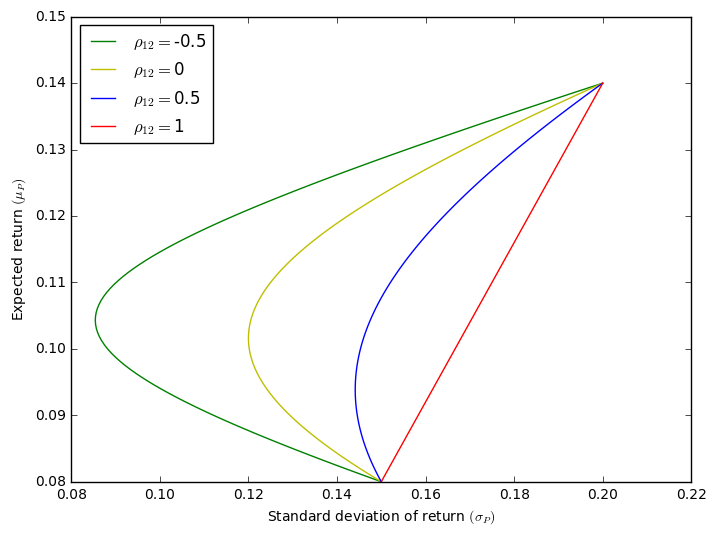

In [80]:
#mu1=0.14;mu2=0.08;sig1=0.2;sig2=0.15;

rho=sy.symbols("rho")
ExpRett=mu2+(mu1-mu2)*w
StdRett=sy.sqrt(sig1**2*w**2+sig2**2*(1-w)**2+2*w*(1-w)*rho*sig1*sig2)
meanf= sy.lambdify((w,rho), ExpRett, "numpy")
stdf=sy.lambdify((w,rho),StdRett,"numpy")
wv=np.linspace(0,1,100)

#% matplotlib qt
color=["g","y","b","r"]
rhos=[-0.5,0,0.5,1]
fig=plt.figure(figsize=(8,6))
ax=fig.add_subplot(1,1,1)
#%matplotlib inline
for i in range(len(rhos)):
    rho12=rhos[i]
    stdv=stdf(wv,rho12)
    meanv=meanf(wv,rho12)
    ax.plot(stdv,meanv,color[i]+"-",label=r"$\rho_{12}=$"+str(round(rho12,2)))  
ax.legend(loc=2) 
ax.set_ylabel("Expected return "+r"$(\mu_P)$")
ax.set_xlabel("Standard deviation of return "+r"$(\sigma_P)$")
plt.show()


#    a=sy.plotting.plot_parametric((StdRetreal,ExpRetreal),(StdRet1,ExpRet1),(StdRet2,ExpRet2),(StdRet3,ExpRet3),(StdRet4,ExpRet4),(w,0,1),xlabel=r"$\sigma_R$",ylabel="mean")
#    a[0].label
#p1=sy.plotting.plot_parametric((StdRetreal,ExpRetreal),(w,0,1), show=False, line_color='r',label="red")
#p2=sy.plotting.plot_parametric((StdRet1,ExpRet1),(w,0,1), show=False, line_color='b',label="red")
#p1.extend(p2)
#p1.show()
 

# 两个风险资产和无风险资产的投资组合

+ 前面已经介绍了有效前沿的概念，其上的点都是给定分配在两种风险资产上的权重所得到的组合的收益率$(R)$的标准差和预期收益$(\sigma_R,E(R))$
+ 权重 $w$ 是取值0，1之间的数，给定$w$后，组合就确定了
+ 下面我们将讨论将两种风险资产构造的风险资产组合和无风险资产混合在一起

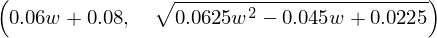

In [83]:
muf=0.06;
mu1=0.14;mu2=0.08;
sig1=0.2;sig2=0.15;
rho12=0

ExpRet=mu2+(mu1-mu2)*w
Varf=sy.simplify(sig1**2*w**2+sig2**2*(1-w)**2+2*w*(1-w)*rho12*sig1*sig2)

StdRet=sy.sqrt(Varf)
#init_printing()
ExpRet,sy.simplify(StdRet)



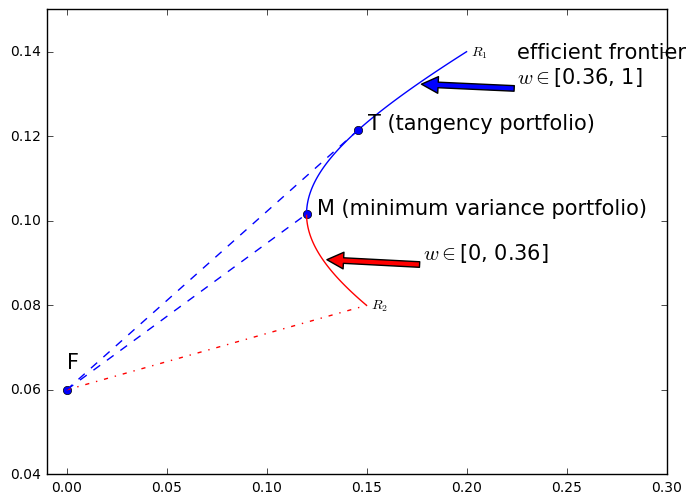

In [87]:
muf=0.06;
mu1=0.14;mu2=0.08;
sig1=0.2;sig2=0.15;
rho12=0

ExpRet=mu2+(mu1-mu2)*w
Varf=sy.simplify(sig1**2*w**2+sig2**2*(1-w)**2+2*w*(1-w)*rho12*sig1*sig2)

StdRet=sy.sqrt(Varf)
#init_printing()
ExpRet,sy.simplify(StdRet)

meanf= sy.lambdify(w, ExpRet, "numpy")
varf=sy.lambdify(w,Varf,"numpy")

#%matplotlib qt
%matplotlib inline

fig=plt.figure(figsize=(8,6)) 

plt.text(sig1+0.002,mu1-0.001,"$R_1$")
plt.text(sig2+0.002,mu2-0.001,"$R_2$")

wmin=float(-Varf.coeff(w,1)/(2*Varf.coeff(w,2)))
mx=np.sqrt(varf(wmin));my=meanf(wmin)
plt.plot([mx,0],[my,muf],"bo")
plt.text(mx+0.005,my,"M (minimum variance portfolio)",fontsize=15)
plt.text(0,muf+0.005,"F",fontsize=15)

wv=np.linspace(0,wmin,101)
stdv=np.sqrt(varf(wv))
meanv=meanf(wv)
plt.plot(stdv,meanv,"r-")  
plt.annotate("$w\in$"+str([0,wmin]), size=15,xy=(stdv[50]+0.002,meanv[50]),
             xytext=(stdv[50]+0.05,meanv[50]),
            arrowprops=dict(facecolor="red"))


wv=np.linspace(wmin,1,101)
stdv=np.sqrt(varf(wv))
meanv=meanf(wv)
plt.plot(stdv,meanv,"b-") 
plt.annotate("efficient frontier\n"+"$w\in$"+str([wmin,1]), size=15,xy=(stdv[80]+0.002,meanv[80]),
             xytext=(stdv[80]+0.05,meanv[80]),
            arrowprops=dict(facecolor="blue"))

plt.xlim([-0.01,max(sig1,sig2)*1.5])
plt.ylim([max(0,muf-0.02),0.15])
plt.plot([0,mx],[muf,my],"b--")
plt.plot([0,sig2],[muf,mu2],"r-.")

# tangency portfolio
v1=mu1-muf;v2=mu2-muf;
Wt=(v1*sig2**2-v2*rho12*sig1*sig2)/(v1*sig2**2+v2*sig1**2-(v1+v2)*rho12*sig1*sig2)
Tx=np.sqrt(varf(Wt));Ty=meanf(Wt)
plt.plot([Tx],[Ty],"bo")
plt.plot([Tx,0],[Ty,muf],"b--")
plt.text(Tx+0.005,Ty,"T (tangency portfolio)",fontsize=15)


+ 无风险资产的收益率为0.06
+ 首先看连接F和 $R_2$的线段， 根据前面介绍过的内容，其描述单个风险资产$R_2$和无风险资产的组合
+ 给定两个风险资产的投资比例，我们就得到一个投资组合。考虑在这个投资组合和无风险收益的组合
+ 若该风险资产投资组合为最小方差组合，当投资于该组合资金的权重从1变化到0时，对应的组合收益率的标准差和期望 $(\sigma,E(R))$ 为上图的MF线段。
+ 我们可以看出，对于有相同风险的组合，FM上的组合比$FR_2$上的组合有更高的预期收益

+ **Sharpe's ratio **
  - sharpe比率值上述直线的斜率，直观解释是承担单位风险所能得到的收益。
  - 衡量投资组合的重要指标
  - 观察上面的图形，什么直线有最高的Sharpe比率？ 

  **最优组合**
  
+ 考虑从F点出发点射线直线，即包含无风险资产的投资组合，从斜率（sharp比率）无穷大开始，我们逐渐降低斜率
+ 当该线第一次接触两个资产的有效前沿时，此时该直线和有效前沿相切，只有一个交点。记该交点为$T$
+ 切点 $T$ 代表的两个风险资产的投资组合为切线组合
+ 线段FT描述的组合是Sharp比率最高的组合！也成为最优组合或有效组合

**有效组合和最优组合**

+ 混合切线组合和无风险资产所得到的组合都是有效组合，
+ 不同的最优组合具有不同的预期收益率和风险要求，但满足如下性质：
   - 给定风险，他是预期收益率最高的组合
   - 更定预期收益率，他是风险最低的组合
+ 因此，在最优组合之间进行选择时，我们如果希望降低风险，就必须同时减低预期收益；相反地，如果我们希望增加预期收益，就不等不接受更高的风险。
+ 选择不同的最优组合只需要改变我们切线组合和无风险资产的投资比率。

**切线组合如何确定？**


+ 设两个风险资产的收益率期望和标准差风别为$\mu_1,\sigma_1,\mu_2,\sigma_2$，相关系数为$\rho_{12}$,
+ 无风险资产的收益率为$\mu_f$
+ 记 $V_1=\mu_1-\mu_f;V_2=\mu_2-\mu_f$，两者为超额收益率，即超过无风险资产的收益率
+ 则切线组合的则切线组合的权重$w_T$，即在投向两种风险资产的资金中第一种资产所占比例，由如下公式确定：
 $$w_T=\frac{V_1\sigma_2^2-V_2\rho_{12}\sigma_1\sigma_2}{V_1 sigma_2^2+V_2 \sigma_1^2-(V_1+V_2)\rho_{12}\sigma_1\sigma_2}$$

+ $R_T$ 表示切线组合收益率，$E(R_T),\sigma_T$表示他的期望和标准差，则


 $$\begin{array}{rl}E(R_T)=&w_T\mu_1+(1-w_T)\mu_2\\ \sigma_T=&\sqrt{w_T^2\sigma_1^2+(1-w_T)^2\sigma_2^2+2\rho_{12}\sigma_1\sigma_2} \end{array}$$

$(1+muf)^{50}=1.03$


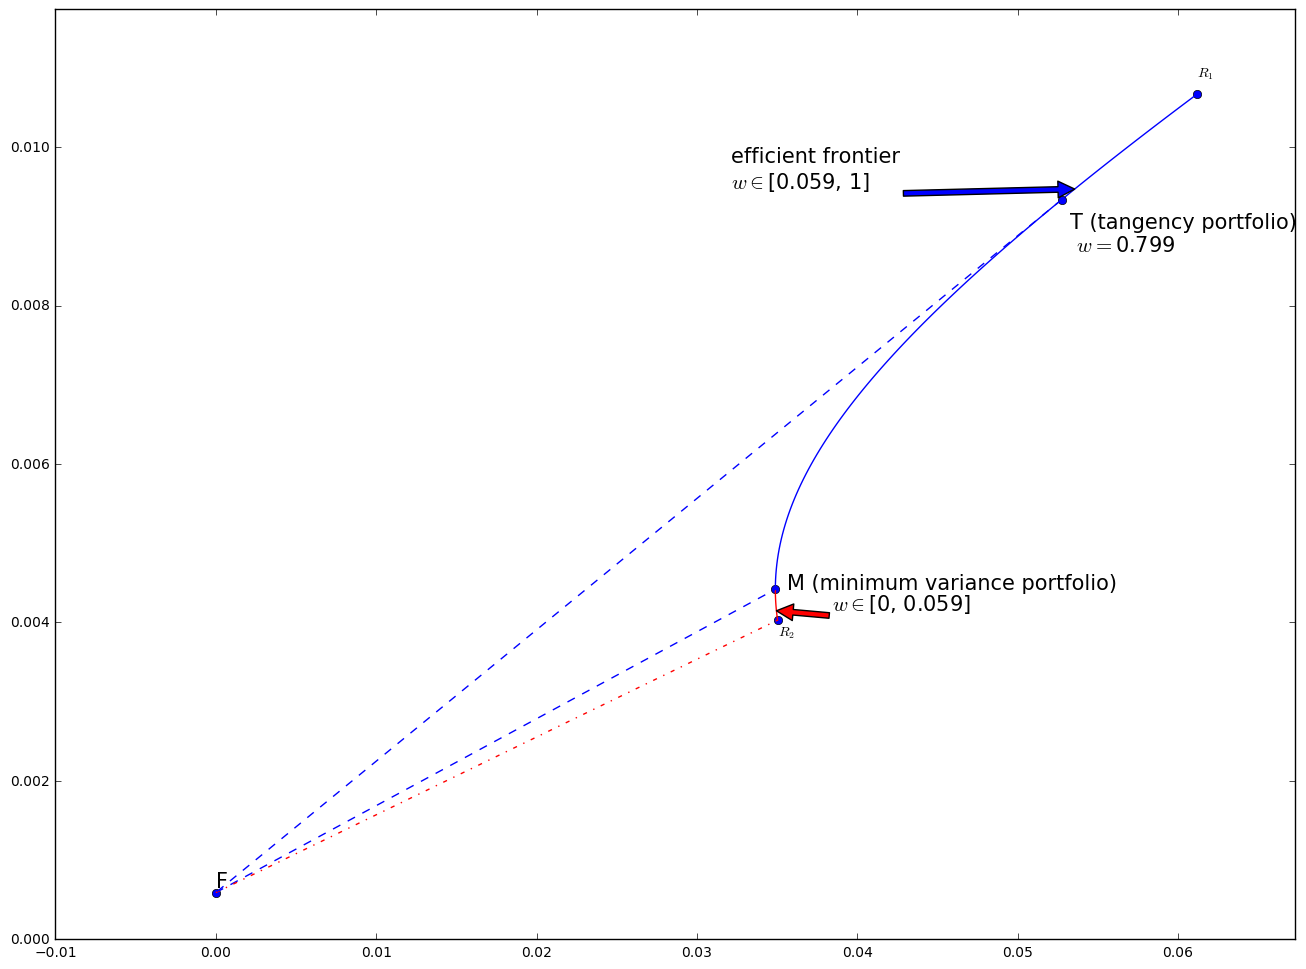

In [82]:
%run "efficentfronter.py"

muf=1.03**(1/50.0)-1
portfolioplot(muf=muf,mu1=0.01067, sig1=0.0612,mu2= 0.00403,sig2= 0.03503, rho12= 0.4945,figsize=(16,12))

## 卖空

+ 卖出我们不拥有的股票即卖空。
+ 首先我们可以向中间商或券商借来股票卖出，得到现金，然后在其后的某个时点，我们再从市场买入数量的归还股票。
+ 当这个过程中股票价格下跌，则我们的现金会有所剩余，扣除借股票的费用后的收入就是盈利。
+ 我们市场上对应的操作是融券
+ 例子：
   - 如果当前股票价格是10元/股，我们向券商融券1万股卖出，得到现金10万元，
   - 若一月后股票价格降为9元，则我们从市场上买入1万股还给券商，花费9万元。
   - 若不考虑各种费用，剩下的1万现金就是我们的利润。
   - 当然，如果一月后股票价格为11元，购买1万股需要的现金就是11万，这种情况下卖空就亏损1万元。
  
  


+ 投资组合中允许卖空即是允许投资的权重小于0，若只有两个资产，其中一个权证小于0，则另一个就会大于1.
+ 若我们有1万元投于两个风险资产，收益率分别为$R_1$和$R_2$。实际的操作为：
   - 借5000元旦B资产卖出，得到5000元现金
   - 将1.5万元投资于A资产
   - 则该组合中我们卖空B资产，其投资权重为-$\frac{1}{2}$，而投资在A资产上的权重为$\frac{3}{2}$
   - 该投资组合的收益率为：
     $$\frac{3}{2}R_1+\left(-\frac{1}{2}\right)R_2$$

## 有效前沿 实例
+ 收益率为0.05的最优投资组合是什么？
+ 如果希望得到0.10的收益，讨论：
  - 只含风险资产的最优投资组合
  - 含风险资产和无风险资产的最优组合
+ 进一步讨论只含一个风险资产和无风险资产的最优组合，假设期望的收益率为0.1
  - 当所有资产的收益率都低于0.1时
  - 比较风险资产增多的影响
    

## $N$ 个风险资产的投资组合

+ 假设我们有$N$个风险资产，第$i$个资产的收益率用$R_i$表示，其期望为$\mu_i$。定义

 $${\bf R}=\left( \begin{array}{c}R_1\\ \vdots\\R_N\end{array}\right)$$
 
 则有：
 
  $$E({\bf R})={\bf\mu}=\left( \begin{array}{c} R_1\\ \vdots\\R_N\end{array}\right)$$
+ 设 $\Omega_{ij}$ 是$R_i$和 $R_j$的协方差，即$\Omega_{ij}=\mbox{COV}(R_i,R_j)$, $\sigma_i=\sqrt{\Omega_{ii}}$ 是 $R_i$的标准差。则$\bf R$的协方差矩阵如下
$$\varOmega=\mbox{COV}({\bf R})$$

+ 设$w_i$为投资在$R_i$资产中的权重，投资组合的权重向量为：
  $$\bf \omega==\left( \begin{array}{c}\omega_1\\ \vdots\\ \omega_N\end{array}\right)$$
+ 记$\bf 1$为$N$个1的向量
$${\bf 1}=\left( \begin{array}{c}1\\ \vdots\\ 1\end{array}\right)$$

+ 通常有假设 $\omega_1+\cdots+\omega_N={\bf 1} ^T {\bf \omega}=1$
+ 权重为$\bf \omega$的投资组合的预期收益率为：
  $$\sum_{i=1}^{N}\omega_i\mu_i={\bf \omega}^T{\bf \mu}$$

+ 若上述投资组合收益率的目标值为$\mu_P$. 
+ 当$N=2$时，我们知道，只有一个组合(权重为$\omega_1$)满足条件， $\mu_P=\mu_2+\omega_1(\mu_1-\mu_2)$
+ 当$N\geq 3$时，有无穷个组合满足该条件，显然，只有最少方差的组合才是有效的。我们的目标即是找到该组合


**有效组合**
+ 权重为$\bf \omega$的组合的方差为：
$$\sum_{i=1}^{N}\sum_{j=1}^{N}\omega_i\omega_j\Omega_{i,j}={\bf \omega}^T\varOmega{\bf \omega}$$
+ 给定 预期收益率目标$\mu_P$, 有效组合极小化上述方差，并且满足下面两个限制条件
$$\omega^T\mu=\mu_P$$
和
$${\omega^T \bf 1}=1$$
+ 记该有效组合的权重向量为$\omega_{\mu P}$,如何计算 $\omega_{\mu P}$?

  **拉格朗日乘子法**
  
+ 优化下列目标函数
 
 $$L(\omega,\delta_1,\delta_2)=\omega^T\varOmega \omega+\delta_1(\mu_P-\omega_{\mu_P}^T\mu)+\delta_2(1-\omega^T{\bf 1})$$
 
 其中$\delta_1,\delta_2$是拉格朗日乘子.
+ 解下面方程

$$0=\frac{\partial}{\partial \omega}L(\omega,\delta_1,\delta_2)=2\varOmega\omega_{\mu_P}-\delta_1\mu-\delta_2 {\bf 1}$$

+ 可得 

$$\omega_{\mu_P}=\frac{1}{2}\varOmega^{-1}(\delta_1\mu+\delta_2{\bf 1})=\varOmega^{-1}(\lambda_1 \mu+\lambda_2{\bf 1})$$

其中，$\lambda_1=1/2\delta_1,\lambda_2=1/2\delta_2$


**求$\lambda_1,\lambda_2$**

+ 我们将上面解方程得到的权重代入两个限制条件，即可解出有效组合权重和其预期收益率的关系

$$\mu_P=\mu^T\omega_{\mu_P}=\lambda_1\mu^T\varOmega^{-1}\mu+\lambda_2\mu^T\varOmega^{-1}{\bf 1}$$
和
$$1={\bf 1}\omega_{\mu_P}=\lambda_1 {\bf 1}^T \varOmega^{-1} \mu +\lambda_2{\bf 1}^T \varOmega^{-1} {\bf 1} $$
+ 引入相应的记号，上述公式变化为：
 
 $$\mu_P=B\lambda_1+A\lambda_2,\mbox{其中} A=\mu^T\varOmega^{-1}{\bf 1},B=\mu^T\varOmega^{-1}\mu$$
和
$$1=A \lambda_1   +B\lambda_2,\mbox{其中} C={\bf 1}^T \varOmega^{-1} {\bf 1} $$

+ 进一步设 
$$D=BC-A^2$$
我们可以解得$\lambda_1,\lambda_2$
$$\lambda_1=\frac{-A+C\mu_P}{D},\quad \lambda_2=\frac{B-A\mu_P}{D}$$
+ 带入拉格朗日乘子法得到的方程，得

$$\omega_{\mu_P}={\bf g} + \mu_P {\bf h}$$

其中 
$${\bf g}=\frac{B}{D}\varOmega^{-1}{\bf 1}-\frac{A}{D}\varOmega^{-1}\mu$$
$${\bf h}=\frac{C}{D}\varOmega^{-1}{\mu}-\frac{A}{D}\varOmega^{-1}{\bf 1}$$


**有效前沿**

+ 当目标收益率$\mu_P$在一定范围内变化时，相应的有效组合构成了有效前沿，通常用如下方法得到：

1. 给定$\mu_P$，计算$\sigma_{\mu_P}$

  (a). 计算$\omega_{\mu_P}={\bf g} + \mu_P {\bf h}$
  
  (b). 计算$\sigma_{\mu_P}=\sqrt{\omega_{\mu_P}^T\varOmega \omega_{\mu_P}}$
  
2. 画出$\sigma_{\mu_P},\mu_P$图形。

+ 和两个风险资产的情形一样，存在一个最小方差组合，该组合的预期收益率为最低可接受的收益率，记为$\mu_{min}$。$\sigma_{\mu_P},\mu_P$曲线$\mu_P\geq \mu_{min}$的部分是有效前沿，而有效前沿下方组合式无效的。